# Cálculo de Factores

In [2]:
import os

import numpy as np
import pandas as pd

pd.set_option('display.max_columns',900)


In [3]:
fname = './datos/cortes/w18/enasama_2024W18_0429_0505.pkl'
df_w18 = pd.read_pickle(fname)

### Consideraciones

1. Filtro "folio" verdadero y de las personas que cumplen la autorización
2. Pero no utilicen los siguientes campos (de la columna O a la AF): 
    1. O   identificador_entidad 
    2. P   clave_entidad_inegi 
    3. Q   nombre_estado 
    4. R   clave_municipio_inegi 
    4. S   clave_concatenada_municipio_inegi 
    5. T   nombre_municipio 
    6. U   clave_localidad 
    6. V   clave_concatenada_localidad 
    7. W   nombre_localidad 
    8. X   clave_ageb_inegi 
    9. Y   ageb_concatenado 
    10. Z  estrato_ageb
    11. AA manzana 
    12. AB entrevistador 
    13. AC consecutivo_hogar 
    14. AD municipio 
    15. AE localidad 
    16. AF ageb 
3. Los campos válidos de localización son los que están al final de la tabla  
4. Usar "edad_corregida"

In [35]:
cols_usadas = ['estrato_unido',
               'upm',
               'entidad',
               'upm_dai',
               'id',
               'token',
               'submitdate',
               'lastpage',
               'startlanguage',
               'seed',
               'startdate',
               'datestamp',
               'ci1',
               'cia1',
               'cia2',
               'ciac',
               'ciac1',
               'ciac1a',
               'ciac2',
               'ciac3',
               'ciac4',
               'cias',
               'cias1',
               'cias2',
               'ds3',
               'ds1',
               'ds2',
               'ds4a',
               'ds4b',
               'ds5',
               'ds5a',
               'ds6',
               'ds7',
               'ds8',
               'ds8a',
               'ds9',
               'ds10',
               'ds10a',
               'ds11',
               'ds12',
               'tb01',
               'tb02',
               'tb03',
               'tb04',
               'tb05',
               'tb06',
               'tb6a',
               'tb07',
               'tb08',
               'tb9a',
               'tb9b',
               'tb9c',
               'tb9d',
               'tb9e',
               'tb9f',
               'tb9f1',
               'tb10_a',
               'tb10_b',
               'tb10_c',
               'tb10_d',
               'tb10_e',
               'tb10_f',
               'tb10f1',
               'n6',
               'tb11a',
               'tb11b',
               'tb11c',
               'tb11d',
               'tb11e',
               'tb11f',
               'tb11g',
               'tb0',
               'tb12',
               'tb13a',
               'tb13b',
               'tb14_a',
               'tb14_b',
               'tb14_c',
               'tb14_d',
               'tb14_e',
               'tb14_f',
               'tb14_g',
               'tb14_h',
               'tb14_i',
               'tb14ia',
               'tb15',
               'tb16',
               'tb16a',
               'tb17',
               'tb18',
               'tb19',
               'tb19b',
               'tb20_a',
               'tb20_b',
               'tb20_c',
               'tb20_d',
               'tb20_e',
               'tb20_f',
               'tb20f1',
               'tb21_a',
               'tb21_b',
               'tb21_c',
               'tb21_d',
               'tb21_e',
               'tb21_f',
               'tb21f1',
               'tb22a',
               'tb22b',
               'tb23',
               'tb23a',
               'tb23b',
               'tb24_a',
               'tb24_b',
               'tb24_c',
               'tb24_d',
               'tb24_e',
               'tb24_f',
               'tb24_g',
               'tb24_h',
               'tb24_i',
               'tb24i1',
               'tb25',
               'tb26',
               'tb27',
               'tb28',
               'tb29',
               'tb30',
               'tb31',
               'tb32',
               'ed1',
               'ed2',
               'ed3_1',
               'ed3_1_comment',
               'ed3_2',
               'ed3_2_comment',
               'ed3_3',
               'ed3_3_comment',
               'ed3_4',
               'ed3_4_comment',
               'ed4_1',
               'ed4_2',
               'ed4_3',
               'ed4_4',
               'ed5',
               'ed6',
               'ed7_1',
               'ed7_1_comment',
               'ed7_2',
               'ed7_2_comment',
               'ed7_3',
               'ed7_3_comment',
               'ed7_4',
               'ed7_4_comment',
               'ed8_1',
               'ed8_2',
               'ed8_3',
               'ed8_4',
               'ed9',
               'pr1a',
               'pr1b',
               'pr1c',
               'pr1d',
               'pr1e',
               'pr1f',
               'pr1g',
               'pr1h',
               'f1',
               'f2',
               'f3',
               'al1',
               'al2',
               'al3',
               'al4',
               'al5',
               'al6',
               'al7',
               'al8',
               'al9',
               'al10',
               'al11',
               'al12',
               'al13',
               'n5',
               'al14',
               'al15a',
               'al15b',
               'al15c',
               'al15d',
               'al15e',
               'al15f',
               'al15g',
               'al15h',
               'al15i',
               'al15j',
               'n7',
               'al16a',
               'al16aa',
               'al16b',
               'al16c',
               'al16d',
               'al16e',
               'al16f',
               'al17a',
               'al17b',
               'al17c',
               'al17d',
               'al17e',
               'al17f',
               'al18a',
               'al18b',
               'al18c',
               'al18d',
               'al18e',
               'al18f',
               'al19a',
               'al19b',
               'al19c',
               'al19d',
               'al19e',
               'al19f',
               'al20',
               'al21',
               'al22',
               'al23_a',
               'al23_a_comment',
               'al23_b',
               'al23_b_comment',
               'al23_c',
               'al23_c_comment',
               'al24',
               'al25',
               'al26',
               'al27',
               'al28',
               'al29',
               'al29a',
               'dra1',
               'dra2',
               'dra3',
               'dra4',
               'dra5',
               'dra6',
               'dra7',
               'dra8',
               'cd1',
               'cd1b',
               'cd2',
               'cd3',
               'cd3b',
               'cd4',
               'cd4b',
               'cd5',
               'cd5b',
               'cd6',
               'n11',
               'cd7',
               'cd7b',
               'cd8',
               'cd8b',
               'cd9',
               'cd9b',
               'cd10',
               'cd11',
               'cd12',
               'cd12b',
               'cd13',
               'cd13b',
               'cd14',
               'cd14b',
               'cd15',
               'cd15b',
               'cd16',
               'cd16b',
               'cd17',
               'cd17b',
               'cd18',
               'cd18b',
               'cd19',
               'cd19a',
               'cd20',
               'cd20b',
               'cd21',
               'cd21b',
               'dm1',
               'dm1a',
               'dm4a',
               'dm5a',
               'dm5a1a',
               'dm6a',
               'dm8a',
               'dm9a',
               'dm10a',
               'dm1b',
               'dm4b',
               'dm5b',
               'dm5a1b',
               'dm6b',
               'dm8b',
               'dm9b',
               'dm10b',
               'dm1c',
               'dm4c',
               'dm5c',
               'dm5a1c',
               'dm6c',
               'dm8c',
               'dm9c',
               'dm10c',
               'dm1d',
               'dm2a_1',
               'dm2a_1_comment',
               'dm2a_2',
               'dm2a_2_comment',
               'dm2a_3',
               'dm2a_3_comment',
               'dm2b_1',
               'dm2b_1_comment',
               'dm2b_2',
               'dm2b_2_comment',
               'dm2b_3',
               'dm2b_3_comment',
               'dm2c_1',
               'dm2c_1_comment',
               'dm2c_2',
               'dm2c_2_comment',
               'dm2c_3',
               'dm2c_3_comment',
               'dm2d_1',
               'dm2d_1_comment',
               'dm2d_2',
               'dm2d_2_comment',
               'dm2d_3',
               'dm2d_3_comment',
               'dm3a_1',
               'dm3a_2',
               'dm3a_3',
               'dm3b_1',
               'dm3b_2',
               'dm3b_3',
               'dm3c_1',
               'dm3c_2',
               'dm3c_3',
               'dm3d_1',
               'dm3d_2',
               'dm3d_3',
               'dm4d',
               'dm5d',
               'dm5a1d',
               'dm6d',
               'dm8d',
               'dm9d',
               'dm10d',
               'di1a',
               'di3a',
               'di4a',
               'di5a',
               'di5a1a',
               'di6a',
               'di8a',
               'di9a',
               'di10a',
               'di1b',
               'di3b',
               'di4b',
               'di5b',
               'di5a1b',
               'di6b',
               'di8b',
               'di9b',
               'di10b',
               'di1c',
               'di3c',
               'di4c',
               'di5c',
               'di5a1c',
               'di6c',
               'di8c',
               'di9c',
               'di10c',
               'di1d',
               'di3d',
               'di4d',
               'di5d',
               'di5a1d',
               'di6d',
               'di8d',
               'di9d',
               'di10d',
               'di1e',
               'di3e',
               'di4e',
               'di5e',
               'di5a1e',
               'di6e',
               'di8e',
               'di9e',
               'di10e',
               'di1f',
               'di3f',
               'di4f',
               'di5f',
               'di5a1f',
               'di6f',
               'di8f',
               'di9f',
               'di10f',
               'di1g',
               'di3g',
               'di4g',
               'di5g',
               'di5a1g',
               'di6g',
               'di8g',
               'di9g',
               'di10g',
               'di1h',
               'di3h',
               'di4h',
               'di5h',
               'di5a1h',
               'di6h',
               'di8h',
               'di9h',
               'di10h',
               'di1i',
               'di3i',
               'di4i',
               'di5i',
               'di5a1i',
               'di6i',
               'di8i',
               'di9i',
               'di10i',
               'di1j',
               'di3j',
               'di4j',
               'di4j1',
               'di4j2',
               'di5j',
               'di5a1j',
               'di6j',
               'di8j',
               'di9j',
               'di10j',
               'di1k',
               'di3k',
               'di4k',
               'di5k',
               'di5a1k',
               'di6k',
               'di8k',
               'di9k',
               'di10k',
               'di1l',
               'di2a_1',
               'di2a_1_comment',
               'di2a_2',
               'di2a_2_comment',
               'di2a_3',
               'di2a_comment',
               'di2b_1',
               'di2b_1_comment',
               'di2b_2',
               'di2b_2_comment',
               'di2b_3',
               'di2b_3_comment',
               'di2c_1',
               'di2c_1_comment',
               'di2c_2',
               'di2c_2_comment',
               'di2c_3',
               'di2c_3_comment',
               'di2d_1',
               'di2d_1_comment',
               'di2d_2',
               'di2d_2_comment',
               'di2d_3',
               'di2d_3_comment',
               'di2e_1',
               'di2e_1_comment',
               'di2e_2',
               'di2e_2_comment',
               'di2e_3',
               'di2e_3_comment',
               'di2f_1',
               'di2f_1_comment',
               'di2f_2',
               'di2f_2_comment',
               'di2f_3',
               'di2f_3_comment',
               'di2g_1',
               'di2g_comment',
               'di2g_2',
               'di2g_2_comment',
               'di2g_3',
               'di2g_3_comment',
               'di2h_1',
               'di2h_1_comment',
               'di2h_2',
               'di2h_2_comment',
               'di2h_3',
               'di2h_3_comment',
               'di2i_1',
               'di2i_1_comment',
               'di2i_2',
               'di2i_2_comment',
               'di2i_3',
               'di2i_3_comment',
               'di2j_1',
               'di2j_1_comment',
               'di2j_2',
               'di2j_2_comment',
               'di2j_3',
               'di2j_3_comment',
               'di2k_1',
               'di2k_1_comment',
               'di2k_2',
               'di2k_2_comment',
               'di2k_3',
               'di2k_3_comment',
               'di2l_1',
               'di2l_1_comment',
               'di2l_2',
               'di2l_2_comment',
               'di2l_3',
               'di2l_3_comment',
               'di3l',
               'di4l',
               'di5l',
               'di5a1l',
               'di6l',
               'di8l',
               'di9l',
               'di10l',
               'id1',
               'id2',
               'id3',
               'id4',
               'id5',
               'id6',
               'id7',
               'id8a',
               'id9a',
               'id8b',
               'id9b',
               'id8c',
               'id9c',
               'id8d',
               'id9d',
               'id8e',
               'id9e',
               'drd1_1',
               'drd1_2',
               'drd1_3',
               'drd1_4',
               'drd1_5',
               'drd1_6',
               'drd1_7',
               'drd1_8',
               'dp',
               'dd1',
               'dd1b',
               'dd2',
               'dd2b',
               'dd2d',
               'dd3',
               'dd3b',
               'dd4',
               'dd4b',
               'n17',
               'dd5',
               'dd5b',
               'dd6',
               'dd6b',
               'dd7',
               'dd7b',
               'dd8',
               'dd8b',
               'dd9',
               'dd9b',
               'dd10',
               'dd10b',
               'dd11',
               'dd11b',
               'dd12',
               'dd12b',
               'dd13',
               'dd13b',
               'dd14a',
               'dd14b',
               'dd15',
               'n19',
               'tg1',
               'n20',
               'tg2',
               'tg3',
               'tg4',
               'tg5',
               'tg6',
               'tg6a',
               'n21',
               'tg7',
               'tg8',
               'tg9',
               'tg10',
               'tg10a',
               'tg10b',
               'tg10c',
               'tg10d',
               'tg10e',
               'tg10f',
               'tg10g',
               'tg10h',
               'tg10i',
               'tg10j',
               'n22',
               'tg11',
               'tg12',
               'tg13',
               'tg14',
               'tg14a',
               'tg14b',
               'tg14c',
               'tg14d',
               'tg14e',
               'tg14f',
               'tg14g',
               'tg14h',
               'tg14i',
               'tg15',
               'tg16a',
               'tg16b',
               'tg16c',
               'tg16d',
               'tg16e',
               'tg16f',
               'tg16g',
               'tg16h',
               'tg16i',
               'tg16j',
               'tg16k',
               'tg16l',
               'tg16m',
               'tg16a1',
               'tg17',
               'tg18',
               'tg19',
               'tg20',
               'tg20a',
               'tg21',
               'tg21a',
               'tg21b',
               'tg21c',
               'tg21d',
               'tg21e',
               'tg21f',
               'tg21g',
               'pc1',
               'pc2',
               'pc2a',
               'pc1b',
               'pc2c',
               'pc2d',
               'pc3',
               'pc3a',
               'pc3ab',
               'pc4',
               'af1',
               'af2',
               'af3',
               'af4',
               'af5',
               'af6',
               'n23',
               'af7',
               'af8',
               'af9',
               'af10',
               'af11',
               'af12',
               'n24',
               'af13',
               'af14',
               'af15',
               'af15b',
               'af16',
               'n25',
               'af17',
               'ar1',
               'ar1b',
               'ar2',
               'ar2b',
               'ar3',
               'ar3b',
               'ar4',
               'ar4b',
               'ar5',
               'ar5b',
               'ar6',
               'ar6b',
               'ar7',
               'ar7b',
               'ar8',
               'ar8b',
               'ar9',
               'ar9b',
               'ar10',
               'ar10b',
               'ar11',
               'ar11b',
               'ar12',
               'ar12b',
               'ar13',
               'ar13b',
               'ar14',
               'de1a',
               'de1ba',
               'de1bb',
               'de2aa',
               'de2ab',
               'de2ba',
               'de2bb',
               'de2bc',
               'de2ca',
               'de2cb',
               'de2d',
               'de3aa',
               'de3ab',
               'de3ac',
               'de3ba',
               'de3bb',
               'de3ca',
               'de3cb',
               'de3da',
               'de3db',
               'de3dc',
               'defa',
               'defb',
               'defc',
               'defd',
               'defe',
               'deff',
               'defg',
               'ap1a',
               'ap1b',
               'n2',
               'ap2a',
               'ap2b',
               'ap2c',
               'ap2d',
               'ap2e',
               'ap2f',
               'ap2g',
               'ap2h',
               'ap2i',
               'ap2j',
               'ap2k',
               'ap2l',
               'ap2m',
               'ap2n',
               'tp1a',
               'tp1b',
               'tp2a',
               'tp2b',
               'tpfa',
               'tpfb',
               'tpfc',
               'tpfd',
               'tpfe',
               'tpff',
               'ago1',
               'ago2',
               'ago3a',
               'ago3b',
               'agofa',
               'agofb',
               'agofc',
               'agofd',
               'agofe',
               'agoff',
               'n26',
               'tag1',
               'tag1a',
               'tag1b',
               'tag2',
               'tag2a',
               'tag2b',
               'tag2c',
               'tag2d',
               'tag2e',
               'tag2f',
               'tag2g',
               'tag2h',
               'tag2i',
               'tag2j',
               'tag2k',
               'tag2l',
               'tagfa',
               'tagfb',
               'tagfc',
               'tagfd',
               'tagfe',
               'tagff',
               'tas1',
               'tas2',
               'tas3',
               'tasfa',
               'tasfb',
               'tasfc',
               'tasfd',
               'tasfe',
               'tasff',
               'tept1a',
               'tept1b',
               'tept1c',
               'tept2a',
               'tept2b',
               'tept2c',
               'tept2d',
               'tept3a',
               'tept3b',
               'tept4a',
               'tept4b',
               'tept5a',
               'tept5b',
               'tept5c',
               'tept5d',
               'tept5e',
               'tept5f',
               'tept6',
               'tept7',
               'tept8',
               'tept9a',
               'tept9b',
               'tept9c',
               'tept9d',
               'tept9e',
               'tept9f',
               'tept9g',
               'sos1',
               'sos1a',
               'sos1b',
               'sos2',
               'sos3',
               'sos3a',
               'a1',
               'a2',
               'a3',
               'a4',
               'a5',
               'a6',
               'a7',
               'aviso',
               'cumple_autorizacion',
               'clave_entidad_dai',
               'nom_ent_largo',
               'nom_ent_corto',
               'longitud',
               'digitos_entidad',
               'folio_ageb',
               'ageb_coincide',
               'clave_ent_paso1',
               'clave_ent_paso2',
               'digitos_entrevistador',
               'folio_val_dai',
               'id_ind',
               'folio',
               'nom_region',
               'cveregion',
               'estrato',
               'nom_estrato',
               'edad_corregida']

In [270]:
df_w18.folio

0        161020001080002116003009
1        161020001080002116003009
2        161020001080002616003005
3        161020001176200216003004
4        161020001176200216003004
                   ...           
36064    240420001012900124004401
36065    240420001012900124004402
36066    240420001012900124004402
36067    240420001012900324004401
36068    240420001012900324004401
Name: folio, Length: 36069, dtype: object

In [39]:
df_w18.loc[:, ['est']]

,estrato_unido,upm,entidad,upm_dai,id,token,submitdate,lastpage,startlanguage,seed,startdate,datestamp,ci1,cia1,cia2,ciac,ciac1,ciac1a,ciac2,ciac3,ciac4,cias,cias1,cias2,ds3,ds1,ds2,ds4a,ds4b,ds5,ds5a,ds6,ds7,ds8,ds8a,ds9,ds10,ds10a,ds11,ds12,tb01,tb02,tb03,tb04,tb05,tb06,tb6a,tb07,tb08,tb9a,tb9b,tb9c,tb9d,tb9e,tb9f,tb9f1,tb10_a,tb10_b,tb10_c,tb10_d,tb10_e,tb10_f,tb10f1,n6,tb11a,tb11b,tb11c,tb11d,tb11e,tb11f,tb11g,tb0,tb12,tb13a,tb13b,tb14_a,tb14_b,tb14_c,tb14_d,tb14_e,tb14_f,tb14_g,tb14_h,tb14_i,tb14ia,tb15,tb16,tb16a,tb17,tb18,tb19,tb19b,tb20_a,tb20_b,tb20_c,tb20_d,tb20_e,tb20_f,tb20f1,tb21_a,tb21_b,tb21_c,tb21_d,tb21_e,tb21_f,tb21f1,tb22a,tb22b,tb23,tb23a,tb23b,tb24_a,tb24_b,tb24_c,tb24_d,tb24_e,tb24_f,tb24_g,tb24_h,tb24_i,tb24i1,tb25,tb26,tb27,tb28,tb29,tb30,tb31,tb32,ed1,ed2,ed3_1,ed3_1_comment,ed3_2,ed3_2_comment,ed3_3,ed3_3_comment,ed3_4,ed3_4_comment,ed4_1,ed4_2,ed4_3,ed4_4,ed5,ed6,ed7_1,ed7_1_comment,ed7_2,ed7_2_comment,ed7_3,ed7_3_comment,ed7_4,ed7_4_comment,ed8_1,ed8_2,ed8_3,ed8_4,ed9,pr1a,pr1b,pr1c,pr1d,pr1e,pr1f,pr1g,pr1h,f1,f2,f3,al1,al2,al3,al4,al5,al6,al7,al8,al9,al10,al11,al12,al13,n5,al14,al15a,al15b,al15c,al15d,al15e,al15f,al15g,al15h,al15i,al15j,n7,al16a,al16aa,al16b,al16c,al16d,al16e,al16f,al17a,al17b,al17c,al17d,al17e,al17f,al18a,al18b,al18c,al18d,al18e,al18f,al19a,al19b,al19c,al19d,al19e,al19f,al20,al21,al22,al23_a,al23_a_comment,al23_b,al23_b_comment,al23_c,al23_c_comment,al24,al25,al26,al27,al28,al29,al29a,dra1,dra2,dra3,dra4,dra5,dra6,dra7,dra8,cd1,cd1b,cd2,cd3,cd3b,cd4,cd4b,cd5,cd5b,cd6,n11,cd7,cd7b,cd8,cd8b,cd9,cd9b,cd10,cd11,cd12,cd12b,cd13,cd13b,cd14,cd14b,cd15,cd15b,cd16,cd16b,cd17,cd17b,cd18,cd18b,cd19,cd19a,cd20,cd20b,cd21,cd21b,dm1,dm1a,dm4a,dm5a,dm5a1a,dm6a,dm8a,dm9a,dm10a,dm1b,dm4b,dm5b,dm5a1b,dm6b,dm8b,dm9b,dm10b,dm1c,dm4c,dm5c,dm5a1c,dm6c,dm8c,dm9c,dm10c,dm1d,dm2a_1,dm2a_1_comment,dm2a_2,dm2a_2_comment,dm2a_3,dm2a_3_comment,dm2b_1,dm2b_1_comment,dm2b_2,dm2b_2_comment,dm2b_3,dm2b_3_comment,dm2c_1,dm2c_1_comment,dm2c_2,dm2c_2_comment,dm2c_3,dm2c_3_comment,dm2d_1,dm2d_1_comment,dm2d_2,dm2d_2_comment,dm2d_3,dm2d_3_comment,dm3a_1,dm3a_2,dm3a_3,dm3b_1,dm3b_2,dm3b_3,dm3c_1,dm3c_2,dm3c_3,dm3d_1,dm3d_2,dm3d_3,dm4d,dm5d,dm5a1d,dm6d,dm8d,dm9d,dm10d,di1a,di3a,di4a,di5a,di5a1a,di6a,di8a,di9a,di10a,di1b,di3b,di4b,di5b,di5a1b,di6b,di8b,di9b,di10b,di1c,di3c,di4c,di5c,di5a1c,di6c,di8c,di9c,di10c,di1d,di3d,di4d,di5d,di5a1d,di6d,di8d,di9d,di10d,di1e,di3e,di4e,di5e,di5a1e,di6e,di8e,di9e,di10e,di1f,di3f,di4f,di5f,di5a1f,di6f,di8f,di9f,di10f,di1g,di3g,di4g,di5g,di5a1g,di6g,di8g,di9g,di10g,di1h,di3h,di4h,di5h,di5a1h,di6h,di8h,di9h,di10h,di1i,di3i,di4i,di5i,di5a1i,di6i,di8i,di9i,di10i,di1j,di3j,di4j,di4j1,di4j2,di5j,di5a1j,di6j,di8j,di9j,di10j,di1k,di3k,di4k,di5k,di5a1k,di6k,di8k,di9k,di10k,di1l,di2a_1,di2a_1_comment,di2a_2,di2a_2_comment,di2a_3,di2a_comment,di2b_1,di2b_1_comment,di2b_2,di2b_2_comment,di2b_3,di2b_3_comment,di2c_1,di2c_1_comment,di2c_2,di2c_2_comment,di2c_3,di2c_3_comment,di2d_1,di2d_1_comment,di2d_2,di2d_2_comment,di2d_3,di2d_3_comment,di2e_1,di2e_1_comment,di2e_2,di2e_2_comment,di2e_3,di2e_3_comment,di2f_1,di2f_1_comment,di2f_2,di2f_2_comment,di2f_3,di2f_3_comment,di2g_1,di2g_comment,di2g_2,di2g_2_comment,di2g_3,di2g_3_comment,di2h_1,di2h_1_comment,di2h_2,di2h_2_comment,di2h_3,di2h_3_comment,di2i_1,di2i_1_comment,di2i_2,di2i_2_comment,di2i_3,di2i_3_comment,di2j_1,di2j_1_comment,di2j_2,di2j_2_comment,di2j_3,di2j_3_comment,di2k_1,di2k_1_comment,di2k_2,di2k_2_comment,di2k_3,di2k_3_comment,di2l_1,di2l_1_comment,di2l_2,di2l_2_comment,di2l_3,di2l_3_comment,di3l,di4l,di5l,di5a1l,di6l,di8l,di9l,di10l,id1,id2,id3,id4,id5,id6,id7,id8a,id9a,id8b,id9b,id8c,id9c,id8d,id9d,id8e,id9e,drd1_1,drd1_2,drd1_3,drd1_4,drd1_5,drd1_6,drd1_7,drd1_8,dp,dd1,dd1b,dd2,dd2b,dd2d,dd3,dd3b,dd4,dd4b,n17,dd5,dd5b,dd6,dd6b,dd7,dd7b,dd8,dd8b,dd9,dd9b,dd10,dd10b,dd11,dd11b,dd12,dd12b,dd13,dd13b,dd14a,dd14b,dd15,n19,tg1,n20,tg2,tg3,tg4,tg5,tg6,tg6a,n21,tg7,tg8,tg9,tg10,tg10a,tg10b,tg10c,tg10d,tg10e,tg10f,tg10g,tg10h,tg10i,tg10j,n22,

In [44]:
(df_w18.clave_ent_paso1==df_w18.clave_ent_paso2).sum()

35479

In [4]:
dfpq = pd.read_csv('./datos/PQ_factor_de_aproximacion_enasama_10_agosto_2024.csv')

In [5]:
dfpq

,cvegeoageb,fid,cve_ent,nom_ent,cve_mun,cvegeomun,nom_mun,cve_loc,cvegeoloc,nom_loc,cve_ageb,cvegeoageb_mtra,estrato,nom_estrato,layer,n_loc,pob_tot,pob_fem,pob_mas,p_12ymas,p_12ymas_f,p_12ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_12a14,p_12a14_f,p_12a14_m,p_15a17,p_15a17_f,p_15a17_m,p_18a24,p_18a24_f,p_18a24_m,p_25a59,p_25a59_f,p_25a59_m,p_60ymas,p_60ymas_f,p_60ymas_m,vivpar_hab,base,POBLACION,PQ
0,0100100001763,63884.0,1.0,Aguascalientes,1.0,1001.0,Aguascalientes,0.0,10010000.0,No aplica,1763,0100100001763,1.0,Rural,02_rural_geografica_con_cortes,39.0,7091.0,3501.0,3520.0,5340.0,2664.0,2676.0,4472.0,2255.0,2217.0,440.0,210.0,230.0,428.0,199.0,229.0,892.0,465.0,427.0,3013.0,1512.0,1501.0,567.0,278.0,289.0,1632.0,censo_iter,17,417.117647
1,0100100001886,63885.0,1.0,Aguascalientes,1.0,1001.0,Aguascalientes,0.0,10010000.0,No aplica,1886,0100100001886,1.0,Rural,02_rural_geografica_con_cortes,16.0,1195.0,587.0,561.0,854.0,450.0,404.0,711.0,372.0,339.0,73.0,35.0,38.0,70.0,43.0,27.0,120.0,58.0,62.0,458.0,244.0,214.0,133.0,70.0,63.0,267.0,censo_iter,24,49.791667
2,0100100001937,63890.0,1.0,Aguascalientes,1.0,1001.0,Aguascalientes,0.0,10010000.0,No aplica,1937,0100100001937,1.0,Rural,02_rural_geografica_con_cortes,44.0,1721.0,810.0,826.0,1190.0,597.0,593.0,972.0,493.0,479.0,100.0,41.0,59.0,118.0,63.0,55.0,231.0,115.0,116.0,649.0,333.0,316.0,92.0,45.0,47.0,378.0,censo_iter,30,57.366667
3,0100100010303,10.0,1.0,Aguascalientes,1.0,1001.0,Aguascalientes,1.0,10010001.0,Aguascalientes,0303,0100100010303,3.0,Urbano Alto,01_urbanas_geograficas_censales,NaN,2202.0,1217.0,985.0,1916.0,1079.0,837.0,1738.0,991.0,747.0,76.0,39.0,37.0,102.0,49.0,53.0,291.0,171.0,120.0,985.0,543.0,442.0,462.0,277.0,185.0,652.0,censo_ageb,18,122.333333
4,0100100010341,13.0,1.0,Aguascalientes,1.0,1001.0,Aguascalientes,1.0,10010001.0,Aguascalientes,0341,0100100010341,3.0,Urbano Alto,01_urbanas_geograficas_censales,NaN,1763.0,913.0,850.0,1513.0,785.0,728.0,1377.0,721.0,656.0,58.0,29.0,29.0,78.0,35.0,43.0,238.0,94.0,144.0,762.0,395.0,367.0,377.0,232.0,145.0,482.0,censo_ageb,21,83.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,3205600010595,63315.0,32.0,Zacatecas,56.0,32056.0,Zacatecas,1.0,320560001.0,Zacatecas,0595,3205600010595,3.0,Urbano Alto,01_urbanas_geograficas_censales,NaN,2205.0,1129.0,1076.0,1758.0,909.0,849.0,1518.0,796.0,722.0,123.0,52.0,71.0,117.0,61.0,56.0,254.0,133.0,121.0,979.0,512.0,467.0,285.0,151.0,134.0,528.0,censo_ageb,22,100.227273
2348,3205600010970,63348.0,32.0,Zacatecas,56.0,32056.0,Zacatecas,1.0,320560001.0,Zacatecas,0970,3205600010970,3.0,Urbano Alto,01_urbanas_geograficas_censales,NaN,93.0,45.0,48.0,79.0,38.0,41.0,66.0,30.0,36.0,6.0,NaN,4.0,7.0,6.0,NaN,14.0,6.0,8.0,45.0,21.0,24.0,7.0,3.0,4.0,24.0,censo_ageb,30,3.100000
2349,3205600010985,63349.0,32.0,Zacatecas,56.0,32056.0,Zacatecas,1.0,320560001.0,Zacatecas,0985,3205600010985,3.0,Urbano Alto,01_urbanas_geograficas_censales,NaN,242.0,130.0,112.0,228.0,122.0,106.0,210.0,112.0,98.0,6.0,4.0,NaN,12.0,6.0,6.0,120.0,65.0,55.0,76.0,41.0,35.0,14.0,6.0,8.0,46.0,censo_ageb,18,13.444444
2350,3205600011038,63353.0,32.0,Zacatecas,56.0,32056.0,Zacatecas,1.0,320560001.0,Zacatecas,1038,3205600011038,3.0,Urbano Alto,01_urbanas_geograficas_censales,NaN,404.0,208.0,196.0,318.0,173.0,145.0,268.0,146.0,122.0,27.0,16.0,11.0,23.0,11.0,12.0,61.0,37.0,24.0,192.0,99.0,93.0,15.0,10.0,5.0,93.0,censo_ageb,17,23.764706


In [9]:
dfpq.PQ.sum() / dfpq.pob_tot.sum()

0.08943242522115633

In [8]:
dfpq.pob_tot.sum()

3990048.0

## Marco censal

Datos del marco censal

In [75]:
recupera = False
if(recupera):
    marco = pd.read_excel('./datos/00-ageb_censales_iterageb_rangospob_viv_2020.xlsx')
else:
    marco.to_pickle('./datos/00-ageb_censales_iterageb_rangospob_viv_2020.pkl')

In [76]:
columnas_marco = ['cvegeoloc','cve_ageb','estrato','pob_tot','pob_masc','pob_fem',
                  'pob_12ymas_tot','pob_12ymas_fem','pob_12ymas_masc','pob_12a17_tot','pob_12a17_fem', 'pob_12a17_masc',
                  'pob_18ymas_tot','pob_18ymas_fem','pob_18ymas_masc','vivparthab']


In [77]:
marco

,fid,cve_ent,cve_mun,cvegeomun,cve_loc,cvegeoloc,cve_ageb,caracteristica_base,layer,pob_tot,pob_fem,pob_masc,pob_12ymas_tot,pob_12ymas_fem,pob_12ymas_masc,pob_12a17_tot,pob_12a17_fem,pob_12a17_masc,pob_18ymas_tot,pob_18ymas_fem,pob_18ymas_masc,vivparthab,num_loc,estrato,nom_edo,nom_mun,nom_loc,cvegeoageb_mtra
0,1,1,1,1001,1,10010001,0017,Ageb urbana con información censal,01_urbanas_geograficas_censales,2237,1137,1100,1579,815,764,244,111,133,1335,704,631,633,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010017
1,2,1,1,1001,1,10010001,006A,Ageb urbana con información censal,01_urbanas_geograficas_censales,1411,712,699,1162,600,562,207,106,101,955,494,461,368,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,010010001006A
2,3,1,1,1001,1,10010001,0106,Ageb urbana con información censal,01_urbanas_geograficas_censales,2962,1497,1465,2238,1166,1072,219,114,105,2019,1052,967,991,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010106
3,4,1,1,1001,1,10010001,0163,Ageb urbana con información censal,01_urbanas_geograficas_censales,2698,1305,1393,1768,882,886,176,78,98,1592,804,788,752,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010163
4,5,1,1,1001,1,10010001,0182,Ageb urbana con información censal,01_urbanas_geograficas_censales,2218,1110,1108,1874,940,934,240,105,135,1634,835,799,610,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81515,81516,30,142,30142,17,301420017,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2414,1233,1181,1865,952,913,274,133,141,1591,819,772,621,1.0,1,Veracruz de Ignacio de la Llave,San Juan Evangelista,La Cerquilla,3014200170000
81516,81517,30,158,30158,16,301580016,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2140,1097,1043,1735,909,826,221,114,107,1514,795,719,683,1.0,1,Veracruz de Ignacio de la Llave,Tecolutla,Hueytepec,3015800160000
81517,81518,30,160,30160,101,301600101,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2238,1174,1064,1812,961,851,230,97,133,1582,864,718,650,1.0,1,Veracruz de Ignacio de la Llave,Álamo Temapache,Potrero del Llano,3016001010000
81518,81519,30,207,30207,83,302070083,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2131,1115,1016,1732,920,812,217,105,112,1515,815,700,673,1.0,1,Veracruz de Ignacio de la Llave,Tres Valles,Novara,3020700830000


La población del censo reportada es de

In [79]:
pobcenso = marco.pob_tot.sum()
print(f"La población reportada en el marco es de {pobcenso}")

La población reportada en el marco es de 126014024


In [83]:
def crea_cve(row):
    return str(row['cvegeoloc']).zfill(9) + str(row['cve_ageb'])

marco['cvegeoageb'] = marco[columnas_marco].apply(lambda x: crea_cve(x), axis=1)


In [85]:
marco[['cvegeoageb','estrato','pob_tot']].pob_tot.sum()

126014024

Las agebs en nuestra muestra (al corte en W18) son las siguientes

In [86]:
agebs_muestra = df_w18.folio.str[:13].unique()

In [87]:
pobmuestra = marco[marco.cvegeoageb.isin(agebs_muestra)].pob_tot.sum()
print(f"La población representada en la muestra es {pobmuestra}")

La población representada en la muestra es 3990048


El factor a nivel nacional es 

$$
\alpha = \frac {P_{censo}} {P_{muestra}}
$$

In [88]:
alpha = pobcenso/pobmuestra

In [89]:
print(f"El factor a nivel nacional es {alpha}")

El factor a nivel nacional es 31.582082220564764


### Por entidad federativa

Vamos a hacer el mismo cálculo a nivel entidad federativa
$$
\alpha_{ent} = \frac {P_{ent, censo}} {P_{ent, muestra}}
$$

In [107]:
def agebs_entidad(df, cve_ent):
    return df[df.clave_entidad_dai==cve_ent].folio.str[:13]

def calcula_factor_df(df1, agebs_muestra):
    """
    Calcula el factor entre el subconjunto censal en df1 (por ejemplo entidad)
    entre la población total representada por la muestra en df2 
    
        df1.pob_tot.sum()
    a = -------------------
        df2.pob_tot.sum()
    
    Parameters:
    - df1: Dataframe del censo referida a alguna unidad administrativa
    - df2: Dataframe de la muestra referida a la misma unidad administrativa
    
    Returns:
    - Float: división de población en df1 / población en df2
    """
    pob1 = df1.pob_tot.sum()
    pob2 = df1[df1.cvegeoageb.isin(agebs_muestra)].pob_tot.sum()
    alpha = pob1/pob2
    return alpha

In [108]:
j = 1
entidad = marco[marco.cve_ent==j]
ageb_ent_j = agebs_entidad(df_w18, j)
calcula_factor_df(entidad, ageb_ent_j)

7.265535254695105

In [109]:
alphas = {i:0 for i in range(1,33)}
for j in range(1, 33):
    entidad = marco[marco.cve_ent==j]
    ageb_ent_j = agebs_entidad(df_w18, j)
    alpha = calcula_factor_df(entidad, ageb_ent_j)
    alphas[j] = alpha

Los factores a nivel entidad son los siguientes:

In [141]:
factores_entidad = pd.DataFrame({'factor_entidad':alphas})

In [143]:
factores_entidad.mean()

factor_entidad    36.331285
dtype: float64

### Por ageb

In [149]:
df_w18['cvegeoageb'] = df_w18.folio.str[:13]
df_w18.head(3)

,estrato_unido,upm,entidad,upm_dai,id,token,submitdate,lastpage,startlanguage,seed,startdate,datestamp,ci1,cia1,cia2,ciac,ciac1,ciac1a,ciac2,ciac3,ciac4,cias,cias1,cias2,ds3,ds1,ds2,ds4a,ds4b,ds5,ds5a,ds6,ds7,ds8,ds8a,ds9,ds10,ds10a,ds11,ds12,tb01,tb02,tb03,tb04,tb05,tb06,tb6a,tb07,tb08,tb9a,tb9b,tb9c,tb9d,tb9e,tb9f,tb9f1,tb10_a,tb10_b,tb10_c,tb10_d,tb10_e,tb10_f,tb10f1,n6,tb11a,tb11b,tb11c,tb11d,tb11e,tb11f,tb11g,tb0,tb12,tb13a,tb13b,tb14_a,tb14_b,tb14_c,tb14_d,tb14_e,tb14_f,tb14_g,tb14_h,tb14_i,tb14ia,tb15,tb16,tb16a,tb17,tb18,tb19,tb19b,tb20_a,tb20_b,tb20_c,tb20_d,tb20_e,tb20_f,tb20f1,tb21_a,tb21_b,tb21_c,tb21_d,tb21_e,tb21_f,tb21f1,tb22a,tb22b,tb23,tb23a,tb23b,tb24_a,tb24_b,tb24_c,tb24_d,tb24_e,tb24_f,tb24_g,tb24_h,tb24_i,tb24i1,tb25,tb26,tb27,tb28,tb29,tb30,tb31,tb32,ed1,ed2,ed3_1,ed3_1_comment,ed3_2,ed3_2_comment,ed3_3,ed3_3_comment,ed3_4,ed3_4_comment,ed4_1,ed4_2,ed4_3,ed4_4,ed5,ed6,ed7_1,ed7_1_comment,ed7_2,ed7_2_comment,ed7_3,ed7_3_comment,ed7_4,ed7_4_comment,ed8_1,ed8_2,ed8_3,ed8_4,ed9,pr1a,pr1b,pr1c,pr1d,pr1e,pr1f,pr1g,pr1h,f1,f2,f3,al1,al2,al3,al4,al5,al6,al7,al8,al9,al10,al11,al12,al13,n5,al14,al15a,al15b,al15c,al15d,al15e,al15f,al15g,al15h,al15i,al15j,n7,al16a,al16aa,al16b,al16c,al16d,al16e,al16f,al17a,al17b,al17c,al17d,al17e,al17f,al18a,al18b,al18c,al18d,al18e,al18f,al19a,al19b,al19c,al19d,al19e,al19f,al20,al21,al22,al23_a,al23_a_comment,al23_b,al23_b_comment,al23_c,al23_c_comment,al24,al25,al26,al27,al28,al29,al29a,dra1,dra2,dra3,dra4,dra5,dra6,dra7,dra8,cd1,cd1b,cd2,cd3,cd3b,cd4,cd4b,cd5,cd5b,cd6,n11,cd7,cd7b,cd8,cd8b,cd9,cd9b,cd10,cd11,cd12,cd12b,cd13,cd13b,cd14,cd14b,cd15,cd15b,cd16,cd16b,cd17,cd17b,cd18,cd18b,cd19,cd19a,cd20,cd20b,cd21,cd21b,dm1,dm1a,dm4a,dm5a,dm5a1a,dm6a,dm8a,dm9a,dm10a,dm1b,dm4b,dm5b,dm5a1b,dm6b,dm8b,dm9b,dm10b,dm1c,dm4c,dm5c,dm5a1c,dm6c,dm8c,dm9c,dm10c,dm1d,dm2a_1,dm2a_1_comment,dm2a_2,dm2a_2_comment,dm2a_3,dm2a_3_comment,dm2b_1,dm2b_1_comment,dm2b_2,dm2b_2_comment,dm2b_3,dm2b_3_comment,dm2c_1,dm2c_1_comment,dm2c_2,dm2c_2_comment,dm2c_3,dm2c_3_comment,dm2d_1,dm2d_1_comment,dm2d_2,dm2d_2_comment,dm2d_3,dm2d_3_comment,dm3a_1,dm3a_2,dm3a_3,dm3b_1,dm3b_2,dm3b_3,dm3c_1,dm3c_2,dm3c_3,dm3d_1,dm3d_2,dm3d_3,dm4d,dm5d,dm5a1d,dm6d,dm8d,dm9d,dm10d,di1a,di3a,di4a,di5a,di5a1a,di6a,di8a,di9a,di10a,di1b,di3b,di4b,di5b,di5a1b,di6b,di8b,di9b,di10b,di1c,di3c,di4c,di5c,di5a1c,di6c,di8c,di9c,di10c,di1d,di3d,di4d,di5d,di5a1d,di6d,di8d,di9d,di10d,di1e,di3e,di4e,di5e,di5a1e,di6e,di8e,di9e,di10e,di1f,di3f,di4f,di5f,di5a1f,di6f,di8f,di9f,di10f,di1g,di3g,di4g,di5g,di5a1g,di6g,di8g,di9g,di10g,di1h,di3h,di4h,di5h,di5a1h,di6h,di8h,di9h,di10h,di1i,di3i,di4i,di5i,di5a1i,di6i,di8i,di9i,di10i,di1j,di3j,di4j,di4j1,di4j2,di5j,di5a1j,di6j,di8j,di9j,di10j,di1k,di3k,di4k,di5k,di5a1k,di6k,di8k,di9k,di10k,di1l,di2a_1,di2a_1_comment,di2a_2,di2a_2_comment,di2a_3,di2a_comment,di2b_1,di2b_1_comment,di2b_2,di2b_2_comment,di2b_3,di2b_3_comment,di2c_1,di2c_1_comment,di2c_2,di2c_2_comment,di2c_3,di2c_3_comment,di2d_1,di2d_1_comment,di2d_2,di2d_2_comment,di2d_3,di2d_3_comment,di2e_1,di2e_1_comment,di2e_2,di2e_2_comment,di2e_3,di2e_3_comment,di2f_1,di2f_1_comment,di2f_2,di2f_2_comment,di2f_3,di2f_3_comment,di2g_1,di2g_comment,di2g_2,di2g_2_comment,di2g_3,di2g_3_comment,di2h_1,di2h_1_comment,di2h_2,di2h_2_comment,di2h_3,di2h_3_comment,di2i_1,di2i_1_comment,di2i_2,di2i_2_comment,di2i_3,di2i_3_comment,di2j_1,di2j_1_comment,di2j_2,di2j_2_comment,di2j_3,di2j_3_comment,di2k_1,di2k_1_comment,di2k_2,di2k_2_comment,di2k_3,di2k_3_comment,di2l_1,di2l_1_comment,di2l_2,di2l_2_comment,di2l_3,di2l_3_comment,di3l,di4l,di5l,di5a1l,di6l,di8l,di9l,di10l,id1,id2,id3,id4,id5,id6,id7,id8a,id9a,id8b,id9b,id8c,id9c,id8d,id9d,id8e,id9e,drd1_1,drd1_2,drd1_3,drd1_4,drd1_5,drd1_6,drd1_7,drd1_8,dp,dd1,dd1b,dd2,dd2b,dd2d,dd3,dd3b,dd4,dd4b,n17,dd5,dd5b,dd6,dd6b,dd7,dd7b,dd8,dd8b,dd9,dd9b,dd10,dd10b,dd11,dd11b,dd12,dd12b,dd13,dd13b,dd14a,dd14b,dd15,n19,tg1,n20,tg2,tg3,tg4,tg5,tg6,tg6a,n21,tg7,tg8,tg9,tg10,tg10a,tg10b,tg10c,tg10d,tg10e,tg10f,tg10g,tg10h,tg10i,tg10j,n22,

In [131]:
n_personas_ageb = pd.DataFrame(df_w18.groupby('cvegeoageb').size(), columns=['n'])
n_personas_ageb

,n
cvegeoageb,
0100100001763,17
0100100001886,24
0100100001937,30
0100100010303,18
0100100010341,21
...,...
3205600010595,22
3205600010970,30
3205600010985,18


In [147]:
agebs_poblacion = marco[marco.cvegeoageb.isin(agebs_muestra)]
agebs_poblacion = agebs_poblacion[['cvegeoageb','pob_tot']].merge(n_personas_ageb, on='cvegeoageb')
agebs_poblacion


,cvegeoageb,pob_tot,n
0,0100100010303,2202,18
1,0100100010341,1763,21
2,0100100010445,1858,21
3,0100100010638,472,12
4,0100100010799,3683,12
...,...,...,...
2113,1200300580000,2344,36
2114,1305100900000,522,12
2115,1305101370000,762,16
2116,2700500120000,1646,12


In [148]:
agebs_poblacion['factor'] = agebs_poblacion['pob_tot'] / agebs_poblacion['n']
agebs_poblacion.factor.isna().sum()

0

In [150]:
marco

,fid,cve_ent,cve_mun,cvegeomun,cve_loc,cvegeoloc,cve_ageb,caracteristica_base,layer,pob_tot,pob_fem,pob_masc,pob_12ymas_tot,pob_12ymas_fem,pob_12ymas_masc,pob_12a17_tot,pob_12a17_fem,pob_12a17_masc,pob_18ymas_tot,pob_18ymas_fem,pob_18ymas_masc,vivparthab,num_loc,estrato,nom_edo,nom_mun,nom_loc,cvegeoageb_mtra,cvegeoageb
0,1,1,1,1001,1,10010001,0017,Ageb urbana con información censal,01_urbanas_geograficas_censales,2237,1137,1100,1579,815,764,244,111,133,1335,704,631,633,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010017,0100100010017
1,2,1,1,1001,1,10010001,006A,Ageb urbana con información censal,01_urbanas_geograficas_censales,1411,712,699,1162,600,562,207,106,101,955,494,461,368,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,010010001006A,010010001006A
2,3,1,1,1001,1,10010001,0106,Ageb urbana con información censal,01_urbanas_geograficas_censales,2962,1497,1465,2238,1166,1072,219,114,105,2019,1052,967,991,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010106,0100100010106
3,4,1,1,1001,1,10010001,0163,Ageb urbana con información censal,01_urbanas_geograficas_censales,2698,1305,1393,1768,882,886,176,78,98,1592,804,788,752,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010163,0100100010163
4,5,1,1,1001,1,10010001,0182,Ageb urbana con información censal,01_urbanas_geograficas_censales,2218,1110,1108,1874,940,934,240,105,135,1634,835,799,610,NaN,3,Aguascalientes,Aguascalientes,Aguascalientes,0100100010182,0100100010182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81515,81516,30,142,30142,17,301420017,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2414,1233,1181,1865,952,913,274,133,141,1591,819,772,621,1.0,1,Veracruz de Ignacio de la Llave,San Juan Evangelista,La Cerquilla,3014200170000,3014200170000
81516,81517,30,158,30158,16,301580016,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2140,1097,1043,1735,909,826,221,114,107,1514,795,719,683,1.0,1,Veracruz de Ignacio de la Llave,Tecolutla,Hueytepec,3015800160000,3015800160000
81517,81518,30,160,30160,101,301600101,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2238,1174,1064,1812,961,851,230,97,133,1582,864,718,650,1.0,1,Veracruz de Ignacio de la Llave,Álamo Temapache,Potrero del Llano,3016001010000,3016001010000
81518,81519,30,207,30207,83,302070083,0000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2131,1115,1016,1732,920,812,217,105,112,1515,815,700,673,1.0,1,Veracruz de Ignacio de la Llave,Tres Valles,Novara,3020700830000,3020700830000


In [140]:
agebs_poblacion[agebs_poblacion.cvegeoageb=='0100100001763']

,cvegeoageb,pob_tot,n,factor
2024,0100100001763,7091,17,417.117647


### Conapo

In [152]:
conapo = pd.read_csv('./datos/00_Pob_Mitad_1950_2070.csv')
conapo

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,580871
1,2,1950,República Mexicana,0,0,Mujeres,568159
2,3,1950,República Mexicana,0,1,Hombres,525478
3,4,1950,República Mexicana,0,1,Mujeres,516674
4,5,1950,República Mexicana,0,2,Hombres,492568
...,...,...,...,...,...,...,...
737655,737656,2070,Zacatecas,32,107,Mujeres,43
737656,737657,2070,Zacatecas,32,108,Hombres,72
737657,737658,2070,Zacatecas,32,108,Mujeres,25
737658,737659,2070,Zacatecas,32,109,Hombres,48


<AxesSubplot:ylabel='Density'>

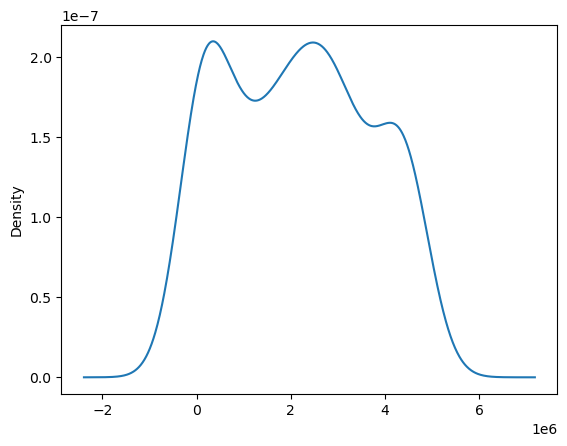

In [160]:
conapo[conapo.CVE_GEO==16].groupby(['EDAD','SEXO']).POBLACION.sum().plot(kind='kde')

## Poblaciones quinquenales

In [161]:
archivos = ['./datos/01-ageb-censales_urbanas_en_localidades_quinquenios_contienelocalidades.csv', 
            './datos/01-relacion_localidades_ageb-urbanas.xlsx',
            './datos/02-relacion_agebrural-localidades.xlsx',
            './datos/02-upm_no_censales_ageb_rural_quinquenios_contieneagebsconsumadelocalidades.csv']

In [197]:
D = {}

for f in archivos:
    extension = f.split(".")[-1]
    inicio = f[len('./datos/'):len('./datos/') + 4]
    print(f"{extension} - {f}")
    if(extension=='csv'):
        func_abrir = pd.read_csv
    elif(extension=='xlsx'):
        func_abrir = pd.read_excel
    df = func_abrir(f)
    D[inicio] = df
    print(df.head(3))
    print("--------------------------------------")

csv - ./datos/01-ageb-censales_urbanas_en_localidades_quinquenios_contienelocalidades.csv
   fid  cve_edo         nom_edo  cve_mun         nom_mun  cve_loc   
0    1        1  Aguascalientes        1  Aguascalientes        1  \
1   39        1  Aguascalientes        1  Aguascalientes      237   
2   40        1  Aguascalientes        1  Aguascalientes      239   

                                             nom_loc  cvegeomun  cvegeoloc   
0                                     Aguascalientes       1001   10010001  \
1                                          Jaltomate       1001   10010237   
2  General José María Morelos y Pavón (Cañada Honda)       1001   10010239   

   pobtot    pobfem    pobmas  p_12ymas  p_12ymas_f  p_12ymas_m  p_12a14   
0  863893  444725.0  419168.0  691969.0    359863.0    332106.0  44432.0  \
1    2805    1438.0    1367.0    2109.0      1088.0      1021.0    187.0   
2    3822    2065.0    1757.0    2946.0      1666.0      1280.0    190.0   

   p_12a14_f  p

In [198]:
D.keys()

dict_keys(['01-a', '01-r', '02-r', '02-u'])

In [228]:
agebs01, rel01 = D['01-a'], D['01-r'] 
upms02, rel02 = D['02-u'], D['02-r']

In [255]:
columnas_f = [x for x in agebs01.columns if (x[-2:]=='_f' and x!='p_12ymas_f' and x!='p_75a79_f' and x[:3]!='p_8')]
columnas_m = [x for x in agebs01.columns if (x[-2:]=='_m' and x!='p_12ymas_m' and x!='p_75a79_m' and x[:3]!='p_8')]

columnas_m

['p_12a14_m',
 'p_15a19_m',
 'p_20a24_m',
 'p_25a29_m',
 'p_30a34_m',
 'p_35a39_m',
 'p_40a44_m',
 'p_45a49_m',
 'p_50a54_m',
 'p_55a59_m',
 'p_60a64_m',
 'p_65a69_m',
 'p_70a74_m']

In [256]:
pobint_f = agebs01[columnas_f]
pobint_m = agebs01[columnas_m]

In [259]:
pobint_m.sum(axis=0).sum(), pobint_f.sum().sum(), pobint_m.sum(axis=0).sum() + pobint_f.sum().sum(),  pobint_f.sum().sum() / pobint_m.sum(axis=0).sum() 

(37535616.0, 40185856.0, 77721472.0, 1.0706060079045991)

In [222]:

upms02[upms02.cvegeoageb=='0100100001068']


,fid,cve_ent,cve_mun,cvegeomun,cve_ageb,cve_loc,cvegeoloc,cvegeoageb,caracteristica_base,layer,pobtot,pobfem,pobmas,p_12ymas,p_12ymas_f,p_12ymas_m,p_12a14,p_12a14_f,p_12a14_m,p_15a19,p_15a19_f,p_15a19_m,p_20a24,p_20a24_f,p_20a24_m,p_25a29,p_25a29_f,p_25a29_m,p_30a34,p_30a34_f,p_30a34_m,p_35a39,p_35a39_f,p_35a39_m,p_40a44,p_40a44_f,p_40a44_m,p_45a49,p_45a49_f,p_45a49_m,p_50a54,p_50a54_f,p_50a54_m,p_55a59,p_55a59_f,p_55a59_m,p_60a64,p_60a64_f,p_60a64_m,p_65a69,p_65a69_f,p_65a69_m,p_70a74,p_70a74_f,p_70a74_m,p_75a79,p_75a79_f,p_75a79_m,p_80a84,p_80a84_f,p_80a84_m,p_85ymas,p_85ymas_f,p_85ymas_m,vivpar_hab,n_loc
0,1,1,1,1001,1068,0,10010000,0100100001068,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,2578,1252,1225,1947,988,959,153,68,85,237,113,124,183,96,87,170,85,85,161,90,71,179,93,86,168,88,80,143,73,70,126,64,62,98,47,51,96,47,49,87,43,44,58,31,27,48,27,21,24,13,11,16,10,6,639,28


In [227]:
agebs01.pobtot.sum() +  upms02.pobtot.sum()

126014024

In [205]:
rel02[rel02.cvegeoageb_mtra=='0100100001068']

,cvegeoageb_mtra,cvegeoloc_loc
0,0100100001068,010010094
1,0100100001068,010010127
2,0100100001068,010010172
3,0100100001068,010010421
4,0100100001068,010010422
5,0100100001068,010010659
6,0100100001068,010010789
7,0100100001068,010010790
8,0100100001068,010010870
9,0100100001068,010010944


In [211]:
upms02.groupby('cvegeoageb').cvegeoloc.size().sum()

17648

In [213]:
rel02.groupby('cvegeoageb_mtra').cvegeoloc_loc.size().sum()

186965

In [216]:
len(upms02[upms02.cvegeoageb.isin(rel02.cvegeoageb_mtra.unique())])

17648

In [266]:
upms_rurales_excedidas = upms02[upms02.pobtot>2500]

In [264]:
upms02[upms02.cvegeoageb.isin(df_w18.cvegeoageb)]

,fid,cve_ent,cve_mun,cvegeomun,cve_ageb,cve_loc,cvegeoloc,cvegeoageb,caracteristica_base,layer,pobtot,pobfem,pobmas,p_12ymas,p_12ymas_f,p_12ymas_m,p_12a14,p_12a14_f,p_12a14_m,p_15a19,p_15a19_f,p_15a19_m,p_20a24,p_20a24_f,p_20a24_m,p_25a29,p_25a29_f,p_25a29_m,p_30a34,p_30a34_f,p_30a34_m,p_35a39,p_35a39_f,p_35a39_m,p_40a44,p_40a44_f,p_40a44_m,p_45a49,p_45a49_f,p_45a49_m,p_50a54,p_50a54_f,p_50a54_m,p_55a59,p_55a59_f,p_55a59_m,p_60a64,p_60a64_f,p_60a64_m,p_65a69,p_65a69_f,p_65a69_m,p_70a74,p_70a74_f,p_70a74_m,p_75a79,p_75a79_f,p_75a79_m,p_80a84,p_80a84_f,p_80a84_m,p_85ymas,p_85ymas_f,p_85ymas_m,vivpar_hab,n_loc
11,12,1,1,1001,1763,0,10010000,0100100001763,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,7091,3501,3520,5340,2664,2676,440,210,230,710,352,358,610,312,298,545,258,287,474,254,220,499,255,244,447,217,230,434,218,216,357,182,175,257,128,129,201,99,102,130,68,62,108,56,52,71,29,42,32,15,17,25,11,14,1632,39
12,13,1,1,1001,1886,0,10010000,0100100001886,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,1195,587,561,854,450,404,73,35,38,102,63,39,88,38,50,85,46,39,86,43,43,77,48,29,59,29,30,51,29,22,54,27,27,46,22,24,32,19,13,37,22,15,29,13,16,20,8,12,6,1,5,9,7,2,267,16
17,18,1,1,1001,1937,0,10010000,0100100001937,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,1721,810,826,1190,597,593,100,41,59,188,98,90,161,80,81,137,75,62,125,66,59,109,57,52,88,47,41,70,28,42,56,27,29,64,33,31,35,19,16,21,9,12,17,6,11,10,5,5,4,2,2,5,4,1,378,44
29,30,1,3,1003,005A,0,10030000,010030000005A,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,3459,1695,1717,2497,1249,1248,232,114,118,330,154,176,235,127,108,269,144,125,234,126,108,213,104,109,202,94,108,185,87,98,138,72,66,129,67,62,78,35,43,75,41,34,71,33,38,45,19,26,38,20,18,23,12,11,856,31
31,32,1,3,1003,0083,0,10030000,0100300000083,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,4345,2226,2108,3413,1770,1643,225,100,125,384,207,177,397,197,200,274,147,127,271,154,117,268,144,124,285,149,136,245,123,122,228,119,109,168,88,80,164,87,77,136,67,69,137,75,62,97,43,54,67,37,30,67,33,34,1160,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,17492,12,3,12003,0000,58,120030058,1200300580000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,2344,1253,1091,1755,941,814,158,82,76,194,89,105,173,94,79,164,91,73,150,78,72,136,76,60,132,87,45,116,58,58,73,44,29,74,38,36,78,44,34,85,49,36,81,45,36,68,26,42,40,18,22,33,22,11,512,1
17507,17508,13,51,13051,0000,90,130510090,1305100900000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,522,273,249,415,223,192,19,9,10,41,20,21,67,34,33,35,16,19,39,25,14,31,23,8,38,15,23,44,25,19,35,18,17,26,14,12,18,11,7,9,5,4,7,5,2,6,3,3,0,0,0,0,0,0,152,1
17549,17550,13,51,13051,0000,137,130510137,1305101370000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,762,390,372,613,315,298,33,16,17,61,25,36,72,33,39,41,21,20,64,37,27,81,43,38,81,39,42,59,36,23,36,21,15,36,15,21,19,7,12,6,4,2,12,9,3,7,4,3,3,3,0,2,2,0,239,1
17625,17626,27,5,27005,0000,12,270050012,2700500120000,Límites de localidades rurales en espacio urba...,04_localidadespoligono_urbanas_menores_a_2500,1646,844,802,1239,634,605,102,52,50,139,65,74,101,56,45,115,60,55,125,68,57,110,58,52,113,63,50,105,49,56,85,38,47,72,34,38,54,30,24,41,20,21,28,16,12,29,15,14,10,5,5,10,5,5,483,1


In [269]:
upms_rurales_excedidas[upms_rurales_excedidas.cvegeoageb.isin(df_w18.cvegeoageb)]

,fid,cve_ent,cve_mun,cvegeomun,cve_ageb,cve_loc,cvegeoloc,cvegeoageb,caracteristica_base,layer,pobtot,pobfem,pobmas,p_12ymas,p_12ymas_f,p_12ymas_m,p_12a14,p_12a14_f,p_12a14_m,p_15a19,p_15a19_f,p_15a19_m,p_20a24,p_20a24_f,p_20a24_m,p_25a29,p_25a29_f,p_25a29_m,p_30a34,p_30a34_f,p_30a34_m,p_35a39,p_35a39_f,p_35a39_m,p_40a44,p_40a44_f,p_40a44_m,p_45a49,p_45a49_f,p_45a49_m,p_50a54,p_50a54_f,p_50a54_m,p_55a59,p_55a59_f,p_55a59_m,p_60a64,p_60a64_f,p_60a64_m,p_65a69,p_65a69_f,p_65a69_m,p_70a74,p_70a74_f,p_70a74_m,p_75a79,p_75a79_f,p_75a79_m,p_80a84,p_80a84_f,p_80a84_m,p_85ymas,p_85ymas_f,p_85ymas_m,vivpar_hab,n_loc
11,12,1,1,1001,1763,0,10010000,0100100001763,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,7091,3501,3520,5340,2664,2676,440,210,230,710,352,358,610,312,298,545,258,287,474,254,220,499,255,244,447,217,230,434,218,216,357,182,175,257,128,129,201,99,102,130,68,62,108,56,52,71,29,42,32,15,17,25,11,14,1632,39
29,30,1,3,1003,005A,0,10030000,010030000005A,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,3459,1695,1717,2497,1249,1248,232,114,118,330,154,176,235,127,108,269,144,125,234,126,108,213,104,109,202,94,108,185,87,98,138,72,66,129,67,62,78,35,43,75,41,34,71,33,38,45,19,26,38,20,18,23,12,11,856,31
31,32,1,3,1003,0083,0,10030000,0100300000083,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,4345,2226,2108,3413,1770,1643,225,100,125,384,207,177,397,197,200,274,147,127,271,154,117,268,144,124,285,149,136,245,123,122,228,119,109,168,88,80,164,87,77,136,67,69,137,75,62,97,43,54,67,37,30,67,33,34,1160,19
44,45,1,6,1006,0047,0,10060000,0100600000047,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,2922,1473,1345,2106,1109,997,164,87,77,261,149,112,250,131,119,237,124,113,174,88,86,152,85,67,154,80,74,154,80,74,159,77,82,114,63,51,82,42,40,68,33,35,48,24,24,32,17,15,34,16,18,23,13,10,633,38
5385,5386,11,19,11019,0015,0,110190000,1101900000015,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,3898,2028,1864,3087,1634,1453,195,105,90,310,151,159,312,159,153,274,158,116,269,149,120,238,133,105,252,131,121,237,126,111,199,99,100,180,105,75,144,75,69,153,86,67,106,46,60,94,53,41,70,31,39,54,27,27,1152,18
5387,5388,11,19,11019,0034,0,110190000,1101900000034,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,7586,3958,3608,5700,3034,2666,432,214,218,636,320,316,604,350,254,621,353,268,637,355,282,537,277,260,477,246,231,369,192,177,332,193,139,293,159,134,240,118,122,178,85,93,118,53,65,93,40,53,51,32,19,82,47,35,2059,26
5459,5460,11,28,11028,0086,0,110280000,1102800000086,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,3180,1578,1585,2643,1338,1305,139,67,72,230,112,118,277,144,133,258,118,140,203,116,87,207,104,103,191,102,89,199,95,104,215,107,108,184,94,90,126,72,54,124,67,57,79,39,40,75,31,44,60,32,28,76,38,38,839,10
5543,5544,11,37,11037,0117,0,110370000,1103700000117,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,4782,2295,2284,3410,1764,1646,289,151,138,471,241,230,402,194,208,385,194,191,351,187,164,323,162,161,298,161,137,229,125,104,192,92,100,112,67,45,99,56,43,93,47,46,67,35,32,45,24,21,29,13,16,25,15,10,1007,65
7857,7858,16,4,16004,002A,0,160040000,160040000002A,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,4679,2387,2292,3627,1869,1758,226,116,110,402,214,188,380,189,191,345,176,169,350,185,165,311,159,152,278,146,132,244,115,129,226,125,101,218,107,111,162,82,80,158,83,75,124,67,57,85,43,42,62,34,28,56,28,28,1240,5
8164,8165,16,43,16043,0013,0,160430000,1604300000013,Ageb rural sin información censal con cortes d...,02_rural_geografica_con_cortes,2811,1360,1383,1976,991,985,172,87,85,241,118,123,209,114,95,183,95,88,213,105,108,177,91,86,172,87,85,147,59,88,120,68,52,89,49,40,100,52,48,63,23,40,34,15,19,28,11,17,10,6,4,18,11,7,662,22
